In [ ]:
# USE ONLY WHILE WORKING ON COLAB
from google.colab import drive
drive.mount("/content/drive/")

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
path="D:\Project Data\hmnist_28_28_RGB.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [6]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [7]:
print(len(train_set))

8012


In [8]:
print(len(test_set))

2003


In [9]:
df.label.unique()

array([4, 1, 3, 6, 0, 2, 5], dtype=int64)

In [10]:
classes={0:('actinic keratoses and intraepithelial carcinomae(Cancer)'),
         1:('basal cell carcinoma(Cancer)'),
         2:('benign keratosis-like lesions(Non-Cancerous)'),
         3:('dermatofibroma(Non-Cancerous)'),
         4:('melanocytic nevi(Non-Cancerous)'),
         5:('pyogenic granulomas and hemorrhage(Can lead to cancer)'),
         6:('melanoma(Cancer)')}


In [11]:
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])


C:\Users\harsh\anaconda3\envs\tensorflow_session\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

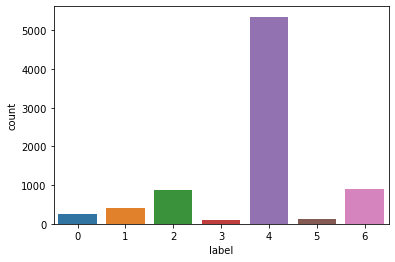

In [12]:
import seaborn as sns
sns.countplot(train_set['label'])

In [13]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

C:\Users\harsh\anaconda3\envs\tensorflow_session\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

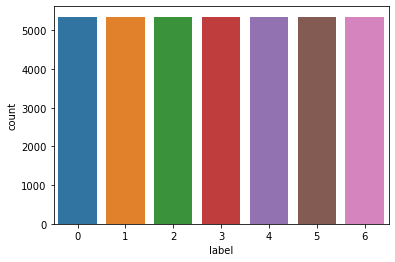

In [14]:
sns.countplot(y_train)

In [15]:
for k in range(7):
  print("Number of ", classes[k],"images: ", len([i for i in y_train if i==k]))

Number of  actinic keratoses and intraepithelial carcinomae(Cancer) images:  5356
Number of  basal cell carcinoma(Cancer) images:  5356
Number of  benign keratosis-like lesions(Non-Cancerous) images:  5356
Number of  dermatofibroma(Non-Cancerous) images:  5356
Number of  melanocytic nevi(Non-Cancerous) images:  5356
Number of  pyogenic granulomas and hemorrhage(Can lead to cancer) images:  5356
Number of  melanoma(Cancer) images:  5356


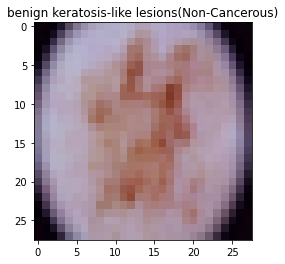

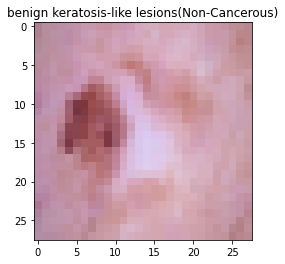

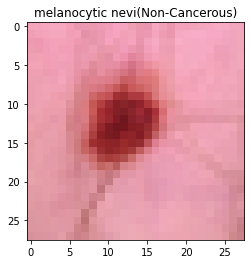

In [16]:
import matplotlib.pyplot as plt
import random
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
for _ in range(3):
  num = random.randint(0, 8000)
  plt.imshow(x_train[num].reshape(28, 28, 3))
  plt.title(classes[y_train[num]])
  plt.show()


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [18]:
model = Sequential()

model.add(Conv2D(16, 
                 kernel_size = (3,3), 
                 input_shape = (28, 28, 3), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(256, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          2

In [19]:
#Checkpoint
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [21]:
Optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=20,
                    shuffle=True,
                    callbacks=[callback])

Epoch 1/20
234/235 [============================>.] - ETA: 0s - loss: 0.0817 - accuracy: 0.9717
Epoch 00001: saving model to best_model.h5
235/235 [==============================] - 23s 97ms/step - loss: 0.0816 - accuracy: 0.9717 - val_loss: 0.9095 - val_accuracy: 0.6546
Epoch 2/20
234/235 [============================>.] - ETA: 0s - loss: 0.0708 - accuracy: 0.9764
Epoch 00002: saving model to best_model.h5
235/235 [==============================] - 25s 105ms/step - loss: 0.0709 - accuracy: 0.9763 - val_loss: 0.4978 - val_accuracy: 0.7602
Epoch 3/20
235/235 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9746 ETA:  - ETA: 
Epoch 00003: saving model to best_model.h5
235/235 [==============================] - 27s 116ms/step - loss: 0.0774 - accuracy: 0.9746 - val_loss: 0.4704 - val_accuracy: 0.8414
Epoch 4/20
234/235 [============================>.] - ETA: 0s - loss: 0.0456 - accuracy: 0.9842
Epoch 00004: saving model to best_model.h5
235/235 [====================

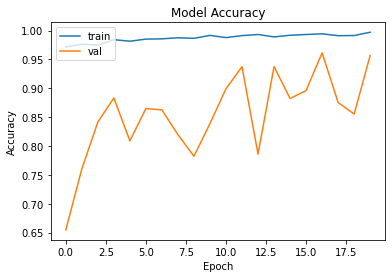

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

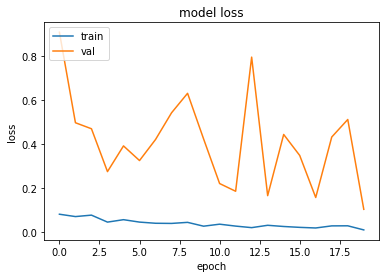

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
model.load_weights('best_model.h5')

In [25]:
x_test = np.array(x_test).reshape(-1, 28, 28, 3)
loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 0s - loss: 1.4472 - accuracy: 0.7374


In [33]:
import PIL

img = PIL.Image.open("D:\Project Data\Part1\ISIC_0024306.jpg")
img = img.resize((28, 28))
img = np.array(img).reshape(-1, 28, 28, 3)
result = model.predict(img)



# print(result[0])

result=result.tolist()
max_prob=max(result[0])
class_ind=result[0].index(max_prob)
print(classes[class_ind])
print("Confidence: ", max(result[0])*100,"%")

melanocytic nevi(Non-Cancerous)
Confidence:  99.98003840446472 %
